In [3]:
import sys
sys.path.append('./models/')
import torch
import matplotlib.pyplot as plt
import numpy as np
from resnet_dcf import ResNet50

In [4]:
def load_weight(path):
    kwargs={"in_channels":3,
        "num_bases":K,
        "initializer":'FB'
       }
    dcf = ResNet50(**kwargs)
    checkdpoint = torch.load(path, map_location='cpu')['state_dict']
    keys = list(checkdpoint.keys())
    dcf_key = ['conv1.weight'] + [i for i in keys if "conv2.weight" in i]
    dcf_weights = []
    for i in range(len(dcf_key)):
        weight = checkdpoint[dcf_key[i]]
        weight = weight.numpy()
        M, N, _, _ = weight.shape
        weight = weight.reshape(M, int(N/K),K)
        dcf_weights += [weight]
    weight_mean = [weight.mean(axis=(0,1)) for weight in dcf_weights]
    return weight_mean

In [5]:
def plot_weight(weight_mean):
    f = plt.figure(figsize=(6,54))
    mask = np.array(range(1,1+K))
    n = len(weight_mean)
    for i in range(n):
        plt.subplot(n,1,i+1)
        mean = weight_mean[i]
        pos_x =  mask[mean>=0]
        pos_value = mean[mean>=0]
        neg_x = mask[mean<0]
        neg_value = mean[mean<0]
        plt.bar(pos_x, pos_value, facecolor='blue')
        plt.bar(neg_x, neg_value, facecolor='red')
        plt.xlabel('base')
        plt.ylabel('mean_weight')

In [6]:
K = 6

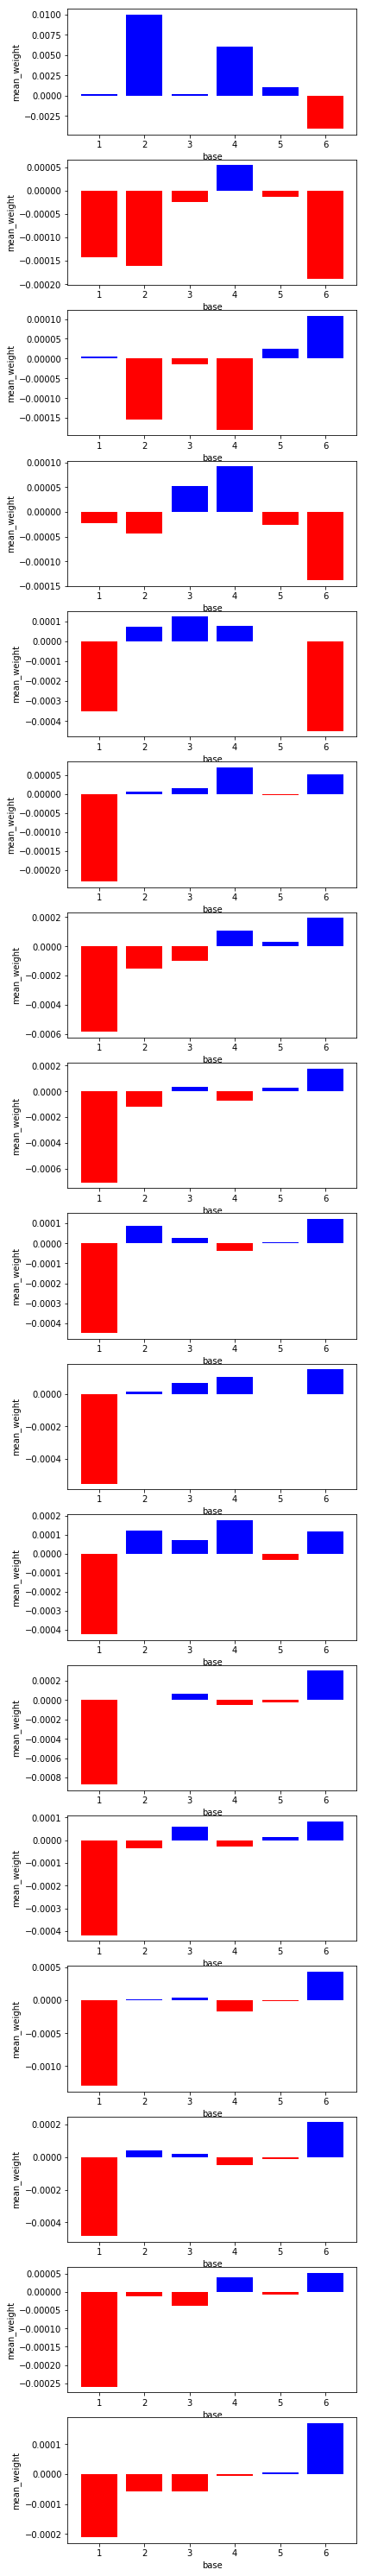

In [8]:
# test_1 L2-norm=5e-4
path = '../tmp_models/model_1_epoch_300_acc_0.9458.pth'
weight_mean = load_weight(path)
plot_weight(weight_mean)